In [106]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib as mpl

In [107]:
## 폰트 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family="NanumGothic")
mpl.font_manager._rebuild()

In [88]:
company_df = pd.read_excel("./src/KRX종목코드.xlsx", dtype=object, index_col=0)
# company_df["종목코드"]["삼성전자"]

In [93]:
## 기업별 주가정보 호출 함수
def stock_info(name, std):
    code = company_df["종목코드"][name]
    result = fdr.DataReader(code, std)
    return result

In [94]:
stock_info("코스피", "2000-01-01")

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,1.959000e+08,0.0301
2000-01-05,986.31,1006.87,1026.52,984.05,2.577000e+08,-0.0687
2000-01-06,960.79,1013.95,1014.90,953.50,2.035200e+08,-0.0259
2000-01-07,948.65,949.17,970.16,930.84,2.156600e+08,-0.0126
2000-01-10,987.24,979.67,994.94,965.02,2.401800e+08,0.0407
...,...,...,...,...,...,...
2021-01-04,2944.45,2874.50,2946.54,2869.11,1.030000e+09,0.0247
2021-01-05,2990.57,2943.67,2990.57,2921.84,1.520000e+09,0.0157
2021-01-06,2968.21,2993.34,3027.16,2961.37,1.790000e+09,-0.0075


In [109]:
targets = ["코스피","삼성전자", "현대차", "LG화학"]

In [110]:
df_list = [stock_info(target, "2000-01-01")['Close'] for target in targets]
len(df_list)

4

In [111]:
df = pd.concat(df_list, axis=1)
df.columns = targets
df

,코스피,삼성전자,현대차,LG화학
Date,,,,
2000-01-04,1059.04,6110.0,20700.0,NaN
2000-01-05,986.31,5580.0,20800.0,NaN
2000-01-06,960.79,5620.0,19700.0,NaN
2000-01-07,948.65,5540.0,20300.0,NaN
2000-01-10,987.24,5770.0,20000.0,NaN
...,...,...,...,...
2021-01-04,2944.45,83000.0,207500.0,889000.0
2021-01-05,2990.57,83900.0,209500.0,893000.0
2021-01-06,2968.21,82200.0,203000.0,890000.0


<AxesSubplot:xlabel='Date'>

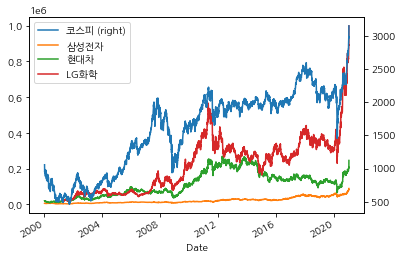

In [113]:
df.plot(secondary_y=['코스피'])